In [ ]:
!pip install torchsummary

In [ ]:
!pip install torch

In [ ]:
!pip install flax
!pip install d2l==1.0.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.7/111.7 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 26.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 56.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 37.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.4/93.4 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 63.2 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
  Attempting uninstall: matplotlib
   

In [ ]:
!pip install torchvision

In [ ]:
!pip install pylance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.5/25.5 MB 59.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.0/40.0 MB 42.9 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 9.0.0
    Uninstalling pyarrow-9.0.0:
      Successfully uninstalled pyarrow-9.0.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-gbq 0.17.9 requires pyarrow<10.0dev,>=3.0.0, but you have pyarrow 13.0.0 which is incompatible.


In [ ]:
import torch
torch.cuda.is_available()


True

In [ ]:
!pip install torch torchvision torchaudio -f https://download.pytorch.org/whl/cu111/torch_stable.html

Looking in links: https://download.pytorch.org/whl/cu111/torch_stable.html


In [ ]:
!pip install light-the-torch
!ltt install torch torchvision

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:


import os                       # for working with files
import numpy as np              # for numerical computationss
import pandas as pd             # for working with dataframes
import torch                    # Pytorch module
import matplotlib.pyplot as plt # for plotting informations on graph and images using tensors
import torch.nn as nn           # for creating  neural networks
from torch.utils.data import DataLoader # for dataloaders
from PIL import Image           # for checking images
import torch.nn.functional as F # for functions for calculating loss
import torchvision.transforms as transforms   # for transforming images into tensors
from torchvision.utils import make_grid       # for data checking
from torchvision.datasets import ImageFolder  # for working with classes and images
from torchsummary import summary              # for getting the summary of our model


%matplotlib inline



Explorando os dados da pasta

In [ ]:
data_dir = "/content/drive/MyDrive/Projeto TCC/Input/New Plant Diseases Dataset(Augmented)"
treino_dir = data_dir + "/train"
val_dir = data_dir + "/valid"
doencas = os.listdir(treino_dir)

In [ ]:
doencas

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [ ]:
print("Quantidade total de doenças: {}".format(len(doencas)))

Quantidade total de doenças: 38


In [ ]:
plantas = []
numdedoencas = 0
for planta in doencas:
    if planta.split('___')[0] not in plantas:
        plantas.append(planta.split('___')[0])
    if planta.split('___')[1] != 'healthy':
        numdedoencas += 1

In [ ]:
print(f"Plantas únicas: \n{plantas}")

Plantas únicas: 
['Apple', 'Blueberry', 'Cherry_(including_sour)', 'Corn_(maize)', 'Grape', 'Orange', 'Peach', 'Pepper,_bell', 'Potato', 'Raspberry', 'Soybean', 'Squash', 'Strawberry', 'Tomato']


In [ ]:
print("Quantidade de plantas: {}".format(len(plantas)))

Quantidade de plantas: 14


In [ ]:
print("Quantidade de doenças: {}".format(numdedoencas))

Quantidade de doenças: 26


In [ ]:
qtde = {}
for doenca in doencas:
    qtde[doenca] = len(os.listdir(treino_dir + '/' + doenca))

img_classe = pd.DataFrame(qtde.values(), index = qtde.keys(), columns=["Qtde. de imagens"])
img_classe

Qtde. de imagens
Apple___Apple_scab                                              2016
Apple___Black_rot                                               1987
Apple___Cedar_apple_rust                                        1760
Apple___healthy                                                 2008
Blueberry___healthy                                             1816
Cherry_(including_sour)___Powdery_mildew                        1683
Cherry_(including_sour)___healthy                               1826
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot              1642
Corn_(maize)___Common_rust_                                     1907
Corn_(maize)___Northern_Leaf_Blight                             1908
Corn_(maize)___healthy                                          1859
Grape___Black_rot                                               1888
Grape___Esca_(Black_Measles)                                    1920
Grape___Leaf_blight_(Isariopsis_Leaf_Spot)                      1722
Grape___healthy                                                 1692
Orange___Haunglongbing_(Citrus_greening)                        2010
Peach___Bacterial_spot                                          1838
Peach___healthy                                                 1728
Pepper,_bell___Bacterial_spot                                   1913
Pepper,_bell___healthy                                          1988
Potato___Early_blight                                           1939
Potato___Late_blight                                            1939
Potato___healthy                                                1824
Raspberry___healthy                                             1781
Soybean___healthy                                               2022
Squash___Powdery_mildew                                         1736
Strawberry___Leaf_scorch                                        1774
Strawberry___healthy                                            1824
Tomato___Bacterial_spot                                         1702
Tomato___Early_blight                                           1920
Tomato___Late_blight                                            1851
Tomato___Leaf_Mold                                              1882
Tomato___Septoria_leaf_spot                                     1745
Tomato___Spider_mites Two-spotted_spider_mite                   1741
Tomato___Target_Spot                                            1827
Tomato___Tomato_Yellow_Leaf_Curl_Virus                          1961
Tomato___Tomato_mosaic_virus                                    1790
Tomato___healthy                                                1926

Text(0.5, 1.0, 'Imagens por tipo de classe de doença das plantas')

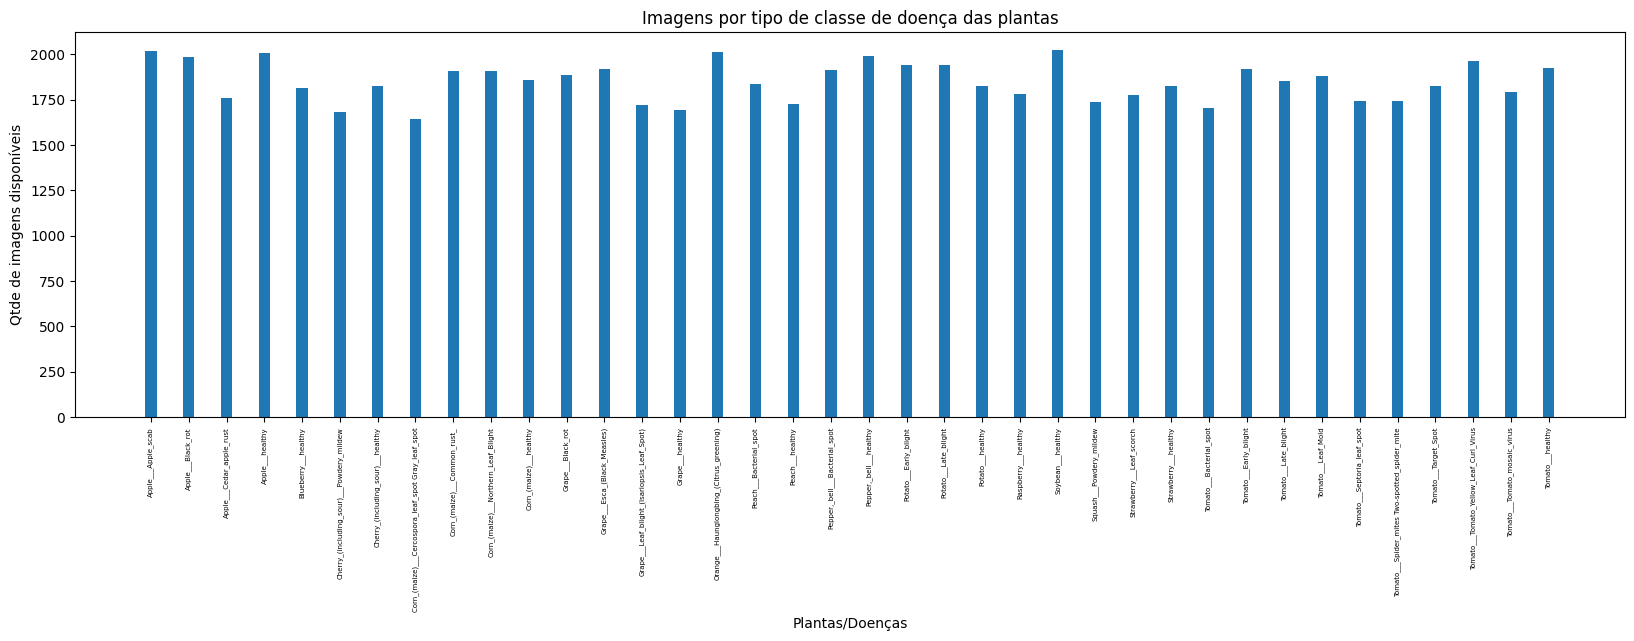

In [ ]:
index = [n for n in range(38)]
plt.figure(figsize=(20, 5))
plt.bar(index, [n for n in qtde.values()], width=0.3)
plt.xlabel('Plantas/Doenças', fontsize=10)
plt.ylabel('Qtde de imagens disponíveis', fontsize=10)
plt.xticks(index, doencas, fontsize=5, rotation=90)
plt.title('Imagens por tipo de classe de doença das plantas')

In [ ]:
qtde_treino = 0
for value in qtde.values():
    qtde_treino += value
print(f"Possui {qtde_treino} imagens para treinamento")

Possui 70295 imagens para treinamento


Preparação dos dados para Treinamento

In [ ]:
treino = ImageFolder(treino_dir, transform=transforms.ToTensor())
val = ImageFolder(val_dir, transform=transforms.ToTensor())

In [ ]:
# Determinando o valor da seed
seed_rand = 14
torch.manual_seed(seed_rand)

In [ ]:
# Determinando o Batch Size
# O tamanho do Batch determina a quantidade de imagens a ser inputada de  uma vez na propagação na CNN
tam_batch = 32

In [ ]:
# DataLoaders para treino e validação
# O Dataloader é uma subclasse que vem do torch.utils.data. Ajuda a carregar datasets que são grandes e consomem bastante memoria
# Shuffle = true ajuda para que os batches nãos ejam, parecidos entre si assim fazendo o modelo ficar melhor
# num_workers denota o numero de processos que são gerados pelas batches em paralelo. pode mudar com base que o seu sistema
treino_dl = DataLoader(treino , tam_batch, shuffle=True, num_workers=2, pin_memory=True)
val_dl = DataLoader(val, tam_batch, num_workers=2, pin_memory=True)

In [ ]:
# função para ver oque esta no batch na parte de treinamento
def mostrar_batch(dados):
    for img, labels in dados:
        fig, ax = plt.subplots(figsize=(30, 30))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(img, nrow=8).permute(1, 2, 0))
        break

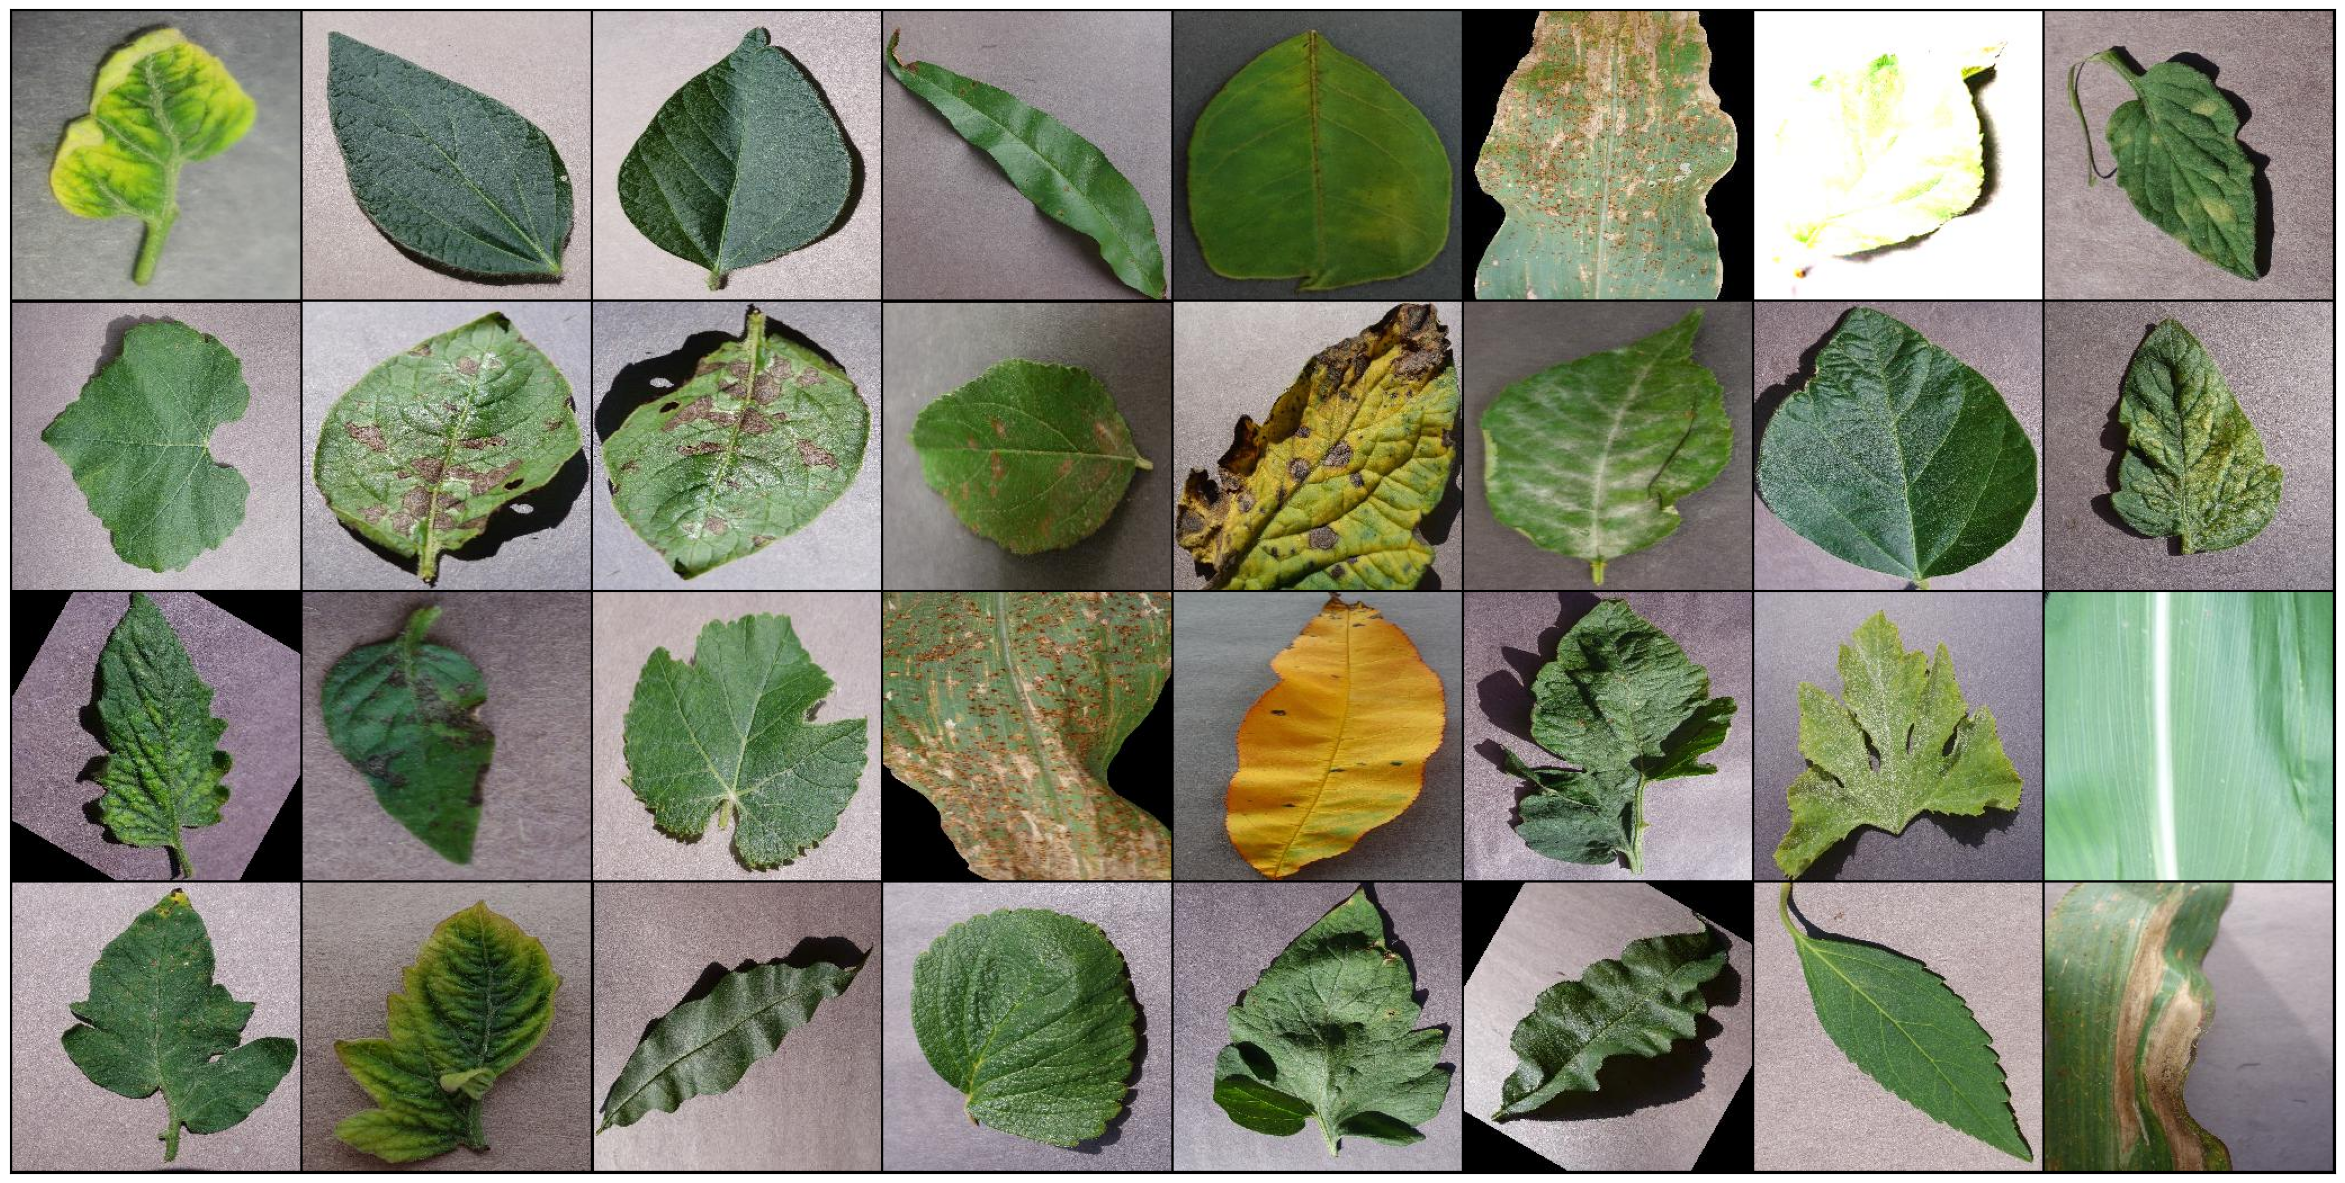

In [ ]:
mostrar_batch(treino_dl)

Modelagem

In [ ]:
# for moving data into GPU (if available)
# cuda funciona apenas para GPUS Nvidia, como a minha é amd irei utilizar apenas a
def pegar_disp_padrao():
 #  """Se tiver Placa de video disponivel vai pegar pelo (cuda), caso não tenha vai pegar o processador (CPU)"""
    if torch.cuda.is_available:
       return torch.device("cuda")

    else:
       return torch.device("cpu")

# for moving data to device (CPU or GPU)
def para_dispositivo(dados, dispositivo):
   # """Mover os tensores para o dispositivo que foi selecionado anteriormente"""
    if isinstance(dados, (list,tuple)):
        return [para_dispositivo(x, dispositivo) for x in dados]
    return dados.to(dispositivo, non_blocking=True)

# for loading in the device (GPU if available else CPU)
class DispositivoDataLoader():
#    """Cria um dataloader (que é um dataset iteravel) e move os dados para o dispositivo"""
    def __init__(proprio, dtl, dispositivo):
        proprio.dl = dtl
        proprio.device = dispositivo

    def __iter__(proprio):
 #       """ batch (numero de amostras que é utilizado na rede neural) que esta sendop movido para o dispositivo"""
        for x in proprio.dl:
            yield para_dispositivo(x, proprio.device)

    def __len__(proprio):
#        """Numero de batches"""
        return len(proprio.dl)

In [ ]:
dispositivo = pegar_disp_padrao()
dispositivo

device(type='cuda')

In [ ]:
# Movendo para a GPU
treino_dl = DispositivoDataLoader(treino_dl, dispositivo)
val_dl = DispositivoDataLoader(val_dl, dispositivo)

In [ ]:
class BlocoResidual(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.conv2 = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()

    def forward(self, x):
        saida = self.conv1(x)
        saida = self.relu1(saida)
        saida = self.conv2(saida)
        return self.relu2(saida) + x # ReLU pode ser aplicada antes ou depois do input

In [ ]:
def precisao(saidas, legendas):
    _, pred = torch.max(saidas, dim=1)
    return torch.tensor(torch.sum(pred == legendas).item() / len(pred))


# classe para o modelo
class ClassificacaoImagem(nn.Module):

    def passo_treinamento(self, batch):
        imagens, legendas = batch
        saida = self(imagens)                  # Gerar as predições
        perda = F.cross_entropy(saida, legendas) # Calcular perda
        return perda

    def passo_validacao(self, batch):
        imagens, legendas = batch
        saida = self(imagens)                 # Gerar as predições
        perda = F.cross_entropy(saida, legendas)  # Calcular peda
        preci = precisao(saida, legendas)          # Calcular precisão
        return {"val_perda": perda.detach(), "val_precisão": preci}

    def validar_epoc(self, saidas):
        batch_perdas = [x["val_perda"] for x in saidas]
        batch_precisao = [x["val_precisão"] for x in saidas]
        epoch_perda = torch.stack(batch_perdas).mean()       #Combinar perdas
        epoch_precisao = torch.stack(batch_precisao).mean()
        return {"val_perda": epoch_perda, "val_precisão": epoch_precisao} # Combinar Precisões

    def epoch_end(self, epoch, resultado):
        print("Epoch [{}], last_lr: {:.5f}, treino_perda: {:.4f}, val_perda: {:.4f}, val_precisão: {:.4f}".format(
            epoch, resultado['lrs'][-1], resultado['treino_perda'], resultado['val_perda'], resultado['val_precisão']))

In [ ]:
# Arquitetura para treinamento

# Bloco de convolução com BatchNormalization
def BlocoConv(in_channels, out_channels, pool=False):
    camadas = [nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
             nn.BatchNorm2d(out_channels),
             nn.ReLU(inplace=True)]
    if pool:
        camadas.append(nn.MaxPool2d(4))
    return nn.Sequential(*camadas)


# Arquitetura ResNet9
class ResNet9(ClassificacaoImagem):
    def __init__(self, canais_entrada, num_doencas):
        super().__init__()

        self.conv1 = BlocoConv(canais_entrada, 64)
        self.conv2 = BlocoConv(64, 128, pool=True) # out_dim : 128 x 64 x 64
        self.res1 = nn.Sequential(BlocoConv(128, 128), BlocoConv(128, 128))

        self.conv3 = BlocoConv(128, 256, pool=True) # out_dim : 256 x 16 x 16
        self.conv4 = BlocoConv(256, 512, pool=True) # out_dim : 512 x 4 x 44
        self.res2 = nn.Sequential(BlocoConv(512, 512), BlocoConv(512, 512))

        self.classifier = nn.Sequential(nn.MaxPool2d(4),
                                       nn.Flatten(),
                                       nn.Linear(512, num_doencas))

    def forward (self, l_batch): # xb is the loaded batch
        saida = self.conv1(l_batch)
        saida = self.conv2(saida)
        saida = self.res1(saida) + saida
        saida = self.conv3(saida)
        saida = self.conv4(saida)
        saida = self.res2(saida) + saida
        saida = self.classifier(saida)
        return saida

In [ ]:
modelo = para_dispositivo(ResNet9(3, len(treino.classes)), dispositivo)
modelo

ResNet9(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=Tr

In [ ]:
Input_forma = (3, 256, 256)
print(summary(modelo.cuda(), (Input_forma)))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 256, 256]           1,792
       BatchNorm2d-2         [-1, 64, 256, 256]             128
              ReLU-3         [-1, 64, 256, 256]               0
            Conv2d-4        [-1, 128, 256, 256]          73,856
       BatchNorm2d-5        [-1, 128, 256, 256]             256
              ReLU-6        [-1, 128, 256, 256]               0
         MaxPool2d-7          [-1, 128, 64, 64]               0
            Conv2d-8          [-1, 128, 64, 64]         147,584
       BatchNorm2d-9          [-1, 128, 64, 64]             256
             ReLU-10          [-1, 128, 64, 64]               0
           Conv2d-11          [-1, 128, 64, 64]         147,584
      BatchNorm2d-12          [-1, 128, 64, 64]             256
             ReLU-13          [-1, 128, 64, 64]               0
           Conv2d-14          [-1, 256,

In [ ]:
# for training
@torch.no_grad()
def avaliar(model, val_loader):
    model.eval()
    saidas = [model.passo_validacao(batch) for batch in val_loader]
    return model.validar_epoc(saidas)


def pegar_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']


def fit_OneCycle(epochs, max_lr, model, treino_loader, val_loader, weight_decay=0,
                grad_clip=None, opt_func=torch.optim.SGD):
    torch.cuda.empty_cache()
    historico = []

    otimizador = opt_func(modelo.parameters(), max_lr, weight_decay=weight_decay)
    # agendar para um ciclo de aprendizado de cada vez
    agendar = torch.optim.lr_scheduler.OneCycleLR(otimizador, max_lr, epochs=epochs, steps_per_epoch=len(treino_loader))


    for epoch in range(epochs):
        # treinamento
        modelo.train()
        traino_perdas = []
        lrs = []
        for batch in treino_loader:
            perda = modelo.passo_treinamento(batch)
            traino_perdas.append(perda)
            perda.backward()

            # gradient clipping
            if grad_clip:
                nn.utils.clip_grad_value_(modelo.parameters(), grad_clip)

            otimizador.step()
            otimizador.zero_grad()

            # recording and updating learning rates
            lrs.append(pegar_lr(otimizador))
            agendar.step()


        # validação
        resultado = avaliar(modelo, val_loader)
        resultado['train_loss'] = torch.stack(traino_perdas).mean().item()
        resultado['lrs'] = lrs
        modelo.epoch_end(epoch, resultado)
        historico.append(resultado)

    return historico

In [ ]:
%%time
historico = [avaliar(modelo, val_dl)]
historico

CPU times: user 21.3 s, sys: 4.06 s, total: 25.3 s
Wall time: 34min 42s


[{'val_perda': tensor(3.6382, device='cuda:0'),
  'val_precisão': tensor(0.0259)}]

In [ ]:
epochs = 2
max_lr = 0.01
grad_clip = 0.1
weight_decay = 1e-4
opt_func = torch.optim.Adam

In [ ]:
%%time
historico += fit_OneCycle(epochs, max_lr, modelo, treino_dl, val_dl,
                             grad_clip=grad_clip,
                             weight_decay=1e-4,
                             opt_func=opt_func)

KeyboardInterrupt: ignored

In [ ]:
def plot_precisao(historico):
    precisao = [x['val_precisao'] for x in historico]
    plt.plot(precisao, '-x')
    plt.xlabel('epoch')
    plt.ylabel('precisao')
    plt.title('precisao vs. Num. de epochs')

def plot_perda(historico):
    treino_perdas = [x.get('treino_perdas') for x in historico]
    val_perdas = [x['val_perdas'] for x in historico]
    plt.plot(treino_perdas, '-bx')
    plt.plot(val_perdas, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('perdas')
    plt.legend(['treinamento', 'validacao'])
    plt.title('perda vs. Num. de epochs')

def plot_lrs(historico):
    lrs = np.concatenate([x.get('lrs', []) for x in historico])
    plt.plot(lrs)
    plt.xlabel('qtde Batch')
    plt.ylabel('Nivel de aprendizado')
    plt.title('Nivel de aprendizado vs. Num de Batch')

In [ ]:
plot_precisao(historico)

In [ ]:
plot_perda(historico)

In [ ]:
plot_lrs(historico)

In [ ]:
teste_dir = "../content/drive/MyDrive/Projeto TCC/Input/new-plant-diseases-dataset"
teste = ImageFolder(teste_dir, transform=transforms.ToTensor())

In [ ]:
teste_img = sorted(os.listdir(teste_dir + '/test'))
teste_img

In [ ]:
def prever_img(img, modelo):
    """Converts image to array and return the predicted class
        with highest probability"""
    # Convert to a batch of 1
    xb = para_dispositivo(img.unsqueeze(0), dispositivo)
    # Get predictions from model
    yb = modelo(xb)
    # Pick index with highest probability
    _, pred  = torch.max(yb, dim=1)
    # Retrieve the class label

    return treino.classes[pred[0].item()]

In [ ]:
# predicting first image
img, label = teste[0]
plt.imshow(img.permute(1, 2, 0))
print('Label:', teste_img[0], ', Predicted:', prever_img(img, modelo))

In [ ]:
# getting all predictions (actual label vs predicted)
for i, (img, label) in enumerate(test):
    print('Label:', teste_img[i], ', Predicted:', prever_img(img, modelo))

In [ ]:
# saving to the kaggle working directory
caminho = './plant-disease-model.pth'
torch.save(modelo.state_dict(), caminho)

In [ ]:
# saving the entire model to working directory
caminho = './plant-disease-model-complete.pth'
torch.save(modelo, caminho)